In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Setting up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Setting up hyper parameters
num_epochs = 10
batch_size = 100
learning_rate = 0.07
input_size = 32*32
output_size = 10

In [4]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Total images in training dataste is: 50000
Random image has shape and labels as : (32, 32, 3) 6


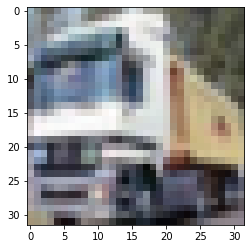

In [5]:
print('Total images in training dataste is:', len(train_data))
print('Random image has shape and labels as :', train_data.data[0].shape, train_data.targets[0])

plt.imshow(train_data.data[1])
plt.show()

In [6]:
# Data Loaders 
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = True)

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
# Implementing Convolutional Neural Network
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(6, 16, 5)
    self.act = nn.ReLU()

    # Check the final conv + pool shape to decide input_size for FC layer
    self.fc1 = nn.Linear(16*5*5, 120)               # Becoz after applying self.conv2+pool, we get images of shape [batch_size, 16, 5, 5] 
    self.fc2 = nn.Linear(120,100)
    self.fc3 = nn.Linear(100,10)

  def forward(self, input):

    # 1. First Conv + Pooling Layer
    conv1 = self.act(self.conv1(input))
    conv1_pool = self.pool(conv1)

    # 2. Second Conv + Pooling Layer
    conv2 = self.act(self.conv2(conv1_pool))
    conv2_pool = self.pool(conv2)

    # 3. FC Layer
    flattened_images = conv2_pool.view(batch_size, -1)
    linear1 = self.act(self.fc1(flattened_images))
    linear2 = self.act(self.fc2(linear1))
    final_output = self.fc3(linear2)

    # return conv1, conv1_pool, conv2, conv2_pool, flattened_images

    return final_output

In [9]:
total_steps = len(train_loader)

model = ConvNet().to(device = device)
criterion = nn.CrossEntropyLoss()                                       # Softmax is already included in CrossEntropy
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
  for batch_index, (images, labels) in enumerate(train_loader):

    # print(images.shape)
    # print(labels.shape)

    # batch looks like : [100, 3, 32, 32]
    # we want our data to look like : [100, 3, 1024]

    images = images.to(device=device)
    labels = labels.to(device=device)

    # print('Input Images shape :', images.shape)

    # Forward Pass
    predictions = model(images)

    # print(predictions.shape)
    # print(labels.shape)

    loss = criterion(predictions, labels)

    # print('First conv shape:', conv1.shape)
    # print('First conv+pool shape:', conv1_pool.shape)

    # print('Second conv shape:', conv2.shape)
    # print('Second conv + pool shape:', conv2_pool.shape)

    # print('Flattened images shape:', flattened_images.shape)


    # Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if batch_index % 100 == 0:
      print(f'Epoch : {epoch+1}, Batch : [{batch_index+100} / {total_steps}],  loss : {loss}')


print('Finished Training')


Epoch : 1, Batch : [100 / 500],  loss : 2.3052170276641846
Epoch : 1, Batch : [200 / 500],  loss : 2.3031656742095947
Epoch : 1, Batch : [300 / 500],  loss : 2.2890849113464355
Epoch : 1, Batch : [400 / 500],  loss : 2.1809380054473877
Epoch : 1, Batch : [500 / 500],  loss : 2.090425968170166
Epoch : 2, Batch : [100 / 500],  loss : 1.9818226099014282
Epoch : 2, Batch : [200 / 500],  loss : 1.9176931381225586
Epoch : 2, Batch : [300 / 500],  loss : 1.8848068714141846
Epoch : 2, Batch : [400 / 500],  loss : 1.8801230192184448
Epoch : 2, Batch : [500 / 500],  loss : 1.8133982419967651
Epoch : 3, Batch : [100 / 500],  loss : 1.7556548118591309
Epoch : 3, Batch : [200 / 500],  loss : 1.9409786462783813
Epoch : 3, Batch : [300 / 500],  loss : 1.658518671989441
Epoch : 3, Batch : [400 / 500],  loss : 1.762843370437622
Epoch : 3, Batch : [500 / 500],  loss : 1.564094066619873
Epoch : 4, Batch : [100 / 500],  loss : 1.5923025608062744
Epoch : 4, Batch : [200 / 500],  loss : 1.4493299722671509
E

In [10]:
# Checking Accuracy on Test Data

n_correct = 0
n_samples = 0

with torch.no_grad():
  for x, y in test_loader:
    x = x.to(device=device)
    y = y.to(device=device)

    test_predictions = model(x)

    value, position = torch.max(test_predictions, axis = 1)

    # print(test_predictions.shape)
    # print(y.shape)
    # print(len(predictions))

    n_correct += (y==position).sum()
    n_samples += y.shape[0]

    #print(n_correct,'/',n_samples)

  accuracy = float((n_correct / n_samples) * 100)
  print('Accuracy on Test Data : ', accuracy)


Accuracy on Test Data :  53.96999740600586
